<a href="https://colab.research.google.com/github/musman2012/ml-data_science/blob/master/Decision_Tree_Complete_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Applying Decision Tree Regression for Predicitng State of Health in Li-Ion Batteries
Following are the list of activities being performed in this notebook:
* Analysis of Complete Battery Data
* Data Cleaning
* Data Pre-processing for Prediction (Coverting String categorical features to Numeric)
* Spliting the data into Test/Train Subbsets
* Applying Decision Tree on the Data
* Evaluating Decision Tree Results on the Test Data

### Statistical Analysis of Battery Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")
!ls

batteries_processed.csv		   Phase-II-ML.ipynb
Decision_Tree_Complete_Data.ipynb  SDA_CW_M_Usman_12036782.ipynb
PCA_Sample_Creation.ipynb	   sd_cw_env.db
phase-II-ml.db			   student-mat.csv


In [0]:
import platform
import dill
#dill.load_session('dec_tree_complete_data.db')
#platform.architecture()

In [0]:
#!pip install tensorflow==2.0.0-alpha0 

In [6]:
'''
authored by Muhammad Usman (musman14@student.bradford.ac.uk)
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

FILE_PATH = "batteries_processed.csv"
bat_data = pd.read_csv(FILE_PATH, error_bad_lines = False)    # reading the data from csv file

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
data_columns = bat_data.columns
bat_data.shape

(5000000, 51)

### Removal of Extra Features

In [8]:
input_data = bat_data.copy()
columns_to_drop = ['id', 'vin', 'vin_prefix', 'record_id','recorded_time', 'actual_time', 'arrival_time', 'powermode', 'mheader_vin', 'mheader_time', 'mheader_type', 'message','cat4', 'cat6', 'cat7', 'inlet_coolant_temp','cooling_energy_used', 'max_soh_cell', 'power_soh', 'min_soh', 'max_soh', 'soh','min_soh_cell_id','imbalance_percent', 'parkingdata_hvbattavgsocoatevent', 'parkingdata_hvbattavtempatevent']
input_data = input_data.drop(columns=columns_to_drop)
input_data.head()

## keep vin_prefix for input variables
## min_voltage is highly correlated with traction voltage and max_voltage
## 

,odometer,ambient_temp,vehicle_speed,balancing_trigger_cell,balancing_status,min_voltage,min_temp,traction_current,max_voltage,imbalance,traction_voltage,min_temp_cell,min_voltage_cell,max_voltage_cell,max_temp,max_temp_cell,fuse_temp,emodule_temp,thermal_manager_mode,outlet_coolant_temp,fast_charge_count,cycle,num_cycle,fast_charge,trip_distance
0,10619,6.5,0.0,22,noBalancing,4.107,12,0.675,4.153,0.046,445,15,22,96,14,1,870,135,activeHeating,195,0,storage,1,False,0
1,9531,4.0,0.0,22,noBalancing,3.983,6,7.375,4.008,0.025,432,16,36,21,7,1,870,90,idle,55,0,storage,1,False,-1088
2,9531,4.0,0.0,22,noBalancing,3.989,6,7.600,4.023,0.034,431,16,36,76,7,1,870,90,idle,55,0,storage,1,False,0
3,9531,4.0,0.0,22,noBalancing,3.984,6,6.850,4.020,0.036,431,16,36,79,7,1,870,90,idle,55,0,storage,1,False,0
4,9531,4.0,0.0,22,noBalancing,3.980,6,7.000,4.015,0.035,431,16,36,85,7,1,870,90,idle,55,0,storage,1,False,0


In [0]:
output_data = bat_data.soh

In [0]:
#!pip install sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [11]:
print(input_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 25 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   odometer                int64  
 1   ambient_temp            float64
 2   vehicle_speed           float64
 3   balancing_trigger_cell  int64  
 4   balancing_status        object 
 5   min_voltage             float64
 6   min_temp                int64  
 7   traction_current        float64
 8   max_voltage             float64
 9   imbalance               float64
 10  traction_voltage        int64  
 11  min_temp_cell           int64  
 12  min_voltage_cell        int64  
 13  max_voltage_cell        int64  
 14  max_temp                int64  
 15  max_temp_cell           int64  
 16  fuse_temp               int64  
 17  emodule_temp            int64  
 18  thermal_manager_mode    object 
 19  outlet_coolant_temp     int64  
 20  fast_charge_count       int64  
 21  cycle                   object 

In [12]:
input_data.describe()

,odometer,ambient_temp,vehicle_speed,balancing_trigger_cell,min_voltage,min_temp,traction_current,max_voltage,imbalance,traction_voltage,min_temp_cell,min_voltage_cell,max_voltage_cell,max_temp,max_temp_cell,fuse_temp,emodule_temp,outlet_coolant_temp,fast_charge_count,num_cycle,trip_distance
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5000000.0,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,6.022747e+03,8.166511e+00,9.096009e+00,5.399849e+01,3.875592e+00,1.297500e+01,9.557473e-01,3.898762e+00,2.317026e-02,4.197902e+02,1.478663e+01,5.057649e+01,4.643353e+01,1.427008e+01,1.035602e+01,870.0,2.231267e+02,1.282786e+02,8.433206e-01,1.348539e+01,2.084781e+00
std,4.665965e+03,1.157040e+01,2.575845e+01,3.102527e+01,1.713892e-01,4.548709e+00,6.158642e+02,1.735946e-01,2.601951e-02,1.826972e+01,1.854689e+01,3.111926e+01,3.034684e+01,4.836183e+00,1.754046e+01,0.0,6.463223e+01,7.146901e+01,5.939860e+00,1.185646e+01,4.613855e+01
min,0.000000e+00,-1.280000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e+01,-2.097152e+05,0.000000e+00,-2.000000e-02,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.000000e+01,1.000000e+00,870.0,-1.500000e+02,-1.600000e+02,0.000000e+00,1.000000e+00,-5.278800e+04
25%,2.813000e+03,6.250000e+00,0.000000e+00,2.800000e+01,3.744000e+00,1.100000e+01,-9.200000e+00,3.768000e+00,1.200000e-02,4.060000e+02,1.000000e+00,2.300000e+01,2.000000e+01,1.200000e+01,1.000000e+00,870.0,1.900000e+02,1.000000e+02,0.000000e+00,5.000000e+00,0.000000e+00
50%,5.412000e+03,9.000000e+00,0.000000e+00,5.400000e+01,3.894000e+00,1.300000e+01,-6.425000e+00,3.918000e+00,1.700000e-02,4.220000e+02,1.000000e+01,4.900000e+01,4.300000e+01,1.400000e+01,1.000000e+00,870.0,2.300000e+02,1.250000e+02,0.000000e+00,1.100000e+01,0.000000e+00
75%,8.233000e+03,1.150000e+01,0.000000e+00,7.900000e+01,4.018000e+00,1.500000e+01,-9.500000e-01,4.043000e+00,2.600000e-02,4.350000e+02,1.800000e+01,7.600000e+01,7.000000e+01,1.700000e+01,1.600000e+01,870.0,2.600000e+02,1.450000e+02,0.000000e+00,1.900000e+01,0.000000e+00
max,1.422560e+05,4.650000e+01,2.001300e+02,1.080000e+02,4.155000e+00,5.100000e+01,2.097152e+05,4.183000e+00,1.141000e+00,4.500000e+02,1.080000e+02,1.080000e+02,1.080000e+02,5.500000e+01,1.080000e+02,870.0,8.750000e+02,8.700000e+02,2.000000e+02,2.470000e+02,5.279000e+04


### Replacing String Categorical Variables to Numeric Categorical Features

In [13]:
object_attr = ['balancing_status', 'thermal_manager_mode', 'cycle', 'fast_charge']
for attr in object_attr:
    print(attr)
    print(bat_data[attr].value_counts())
    

balancing_status
noBalancing         3572630
passiveBalancing    1426264
initialValue           1106
Name: balancing_status, dtype: int64
thermal_manager_mode
idle                2647812
activeHeating       2340570
passingCooling         5702
thermalBalancing       4862
initialValue            558
activeCooling           496
Name: thermal_manager_mode, dtype: int64
cycle
charge     3595456
drive       937049
storage     467495
Name: cycle, dtype: int64
fast_charge
False    4979009
True       20991
Name: fast_charge, dtype: int64


In [0]:
balancing_kvp = {'noBalancing' : 1, 'passiveBalancing' : 2, 'initialValue' : 3}
thermal_kvp = {'idle' : 1, 'activeHeating' : 2, 'passingCooling' : 3, 'thermalBalancing' : 4, 'initialValue' : 5, 'activeCooling' : 6}
cycle_kvp = {'charge' : 1, 'drive' : 2, 'storage' : 3}
fast_charge_kvp = {False : 0, True : 1}

In [0]:
input_data[object_attr[0]] = input_data[object_attr[0]].replace(balancing_kvp)
input_data[object_attr[1]] = input_data[object_attr[1]].replace(thermal_kvp)
input_data[object_attr[2]] = input_data[object_attr[2]].replace(cycle_kvp)
input_data[object_attr[3]] = input_data[object_attr[3]].replace(fast_charge_kvp)
#fast_charge_kvp = {False : -1, True : 1}

In [16]:
#input_data = input_data.drop(columns=['recorded_time'])
input_data.head()

,odometer,ambient_temp,vehicle_speed,balancing_trigger_cell,balancing_status,min_voltage,min_temp,traction_current,max_voltage,imbalance,traction_voltage,min_temp_cell,min_voltage_cell,max_voltage_cell,max_temp,max_temp_cell,fuse_temp,emodule_temp,thermal_manager_mode,outlet_coolant_temp,fast_charge_count,cycle,num_cycle,fast_charge,trip_distance
0,10619,6.5,0.0,22,1,4.107,12,0.675,4.153,0.046,445,15,22,96,14,1,870,135,2,195,0,3,1,0,0
1,9531,4.0,0.0,22,1,3.983,6,7.375,4.008,0.025,432,16,36,21,7,1,870,90,1,55,0,3,1,0,-1088
2,9531,4.0,0.0,22,1,3.989,6,7.600,4.023,0.034,431,16,36,76,7,1,870,90,1,55,0,3,1,0,0
3,9531,4.0,0.0,22,1,3.984,6,6.850,4.020,0.036,431,16,36,79,7,1,870,90,1,55,0,3,1,0,0
4,9531,4.0,0.0,22,1,3.980,6,7.000,4.015,0.035,431,16,36,85,7,1,870,90,1,55,0,3,1,0,0


In [17]:
input_data.replace([np.inf, -np.inf], np.nan)

,odometer,ambient_temp,vehicle_speed,balancing_trigger_cell,balancing_status,min_voltage,min_temp,traction_current,max_voltage,imbalance,traction_voltage,min_temp_cell,min_voltage_cell,max_voltage_cell,max_temp,max_temp_cell,fuse_temp,emodule_temp,thermal_manager_mode,outlet_coolant_temp,fast_charge_count,cycle,num_cycle,fast_charge,trip_distance
0,10619,6.50,0.0,22,1,4.107,12,0.675,4.153,0.046,445,15,22,96,14,1,870,135,2,195,0,3,1,0,0
1,9531,4.00,0.0,22,1,3.983,6,7.375,4.008,0.025,432,16,36,21,7,1,870,90,1,55,0,3,1,0,-1088
2,9531,4.00,0.0,22,1,3.989,6,7.600,4.023,0.034,431,16,36,76,7,1,870,90,1,55,0,3,1,0,0
3,9531,4.00,0.0,22,1,3.984,6,6.850,4.020,0.036,431,16,36,79,7,1,870,90,1,55,0,3,1,0,0
4,9531,4.00,0.0,22,1,3.980,6,7.000,4.015,0.035,431,16,36,85,7,1,870,90,1,55,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,11008,9.75,0.0,87,1,4.123,14,-3.550,4.140,0.017,445,16,87,44,16,25,870,255,1,140,8,1,32,0,0
4999996,11008,9.75,0.0,87,1,4.123,14,-2.925,4.139,0.016,445,16,74,44,16,25,870,255,1,140,8,1,32,0,0
4999997,11008,9.75,0.0,87,1,4.123,14,-3.425,4.140,0.017,445,16,87,44,16,25,870,255,1,140,8,1,32,0,0
4999998,11008,9.75,0.0,87,1,4.124,14,-3.400,4.140,0.016,445,16,74,44,16,25,870,255,1,140,8,1,32,0,0


In [18]:
input_data.isnull().sum().sum()
#input_data['imbalance_percent'].value_counts()

0

### Test/Train Split of 20/80

In [0]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=0)

### Applying Decision Tree Regression

In [0]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor()

In [0]:
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

### Evaluating Decision Tree Results

In [30]:
from sklearn.model_selection import cross_val_score

score = reg_tree.score(X_test, y_test)
print(score)

0.9588930792850042


This score is coefficient of determination R<sup>2</sup>. The coefficient R<sup>2</sup> is defined as (1 - u/v), where u is the residual sum of squares (y_true - y_pred)<sup>2</sup> and v is the total sum of squares (y_true - y_true.mean()<sup>2</sup>. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

In [23]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn import metrics
#reg_tree_pred.value_counts()
#metrics.accuracy_score(y_test, reg_tree_pred)
#metrics.f1_score(y_test, reg_tree_pred)
mse = metrics.mean_squared_error(y_test, reg_tree_pred)
print(mse)

0.21411672774444465


In [24]:
from yellowbrick.regressor import PredictionError

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


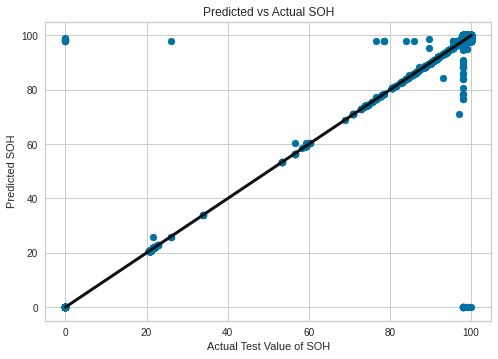

In [25]:
fig, ax = plt.subplots()
ax.scatter(y_test, reg_tree_pred)
ax.set_title('Predicted vs Actual SOH')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=3)
ax.set_xlabel('Actual Test Value of SOH')
ax.set_ylabel('Predicted SOH')
plt.show()

In [26]:
#def f(x):
#    x = x.ravel()
#   return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

'''
plt.figure(figsize=(10, 6))
#plt.plot(X_test, f(X_test), "b")
plt.scatter(X_test, y_test, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
#plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()
'''

'\nplt.figure(figsize=(10, 6))\n#plt.plot(X_test, f(X_test), "b")\nplt.scatter(X_test, y_test, c="b", s=20)\nplt.plot(X_test, reg_tree_pred, "g", lw=2)\nplt.xlim([-5, 5])\n#plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))\nplt.show()\n'

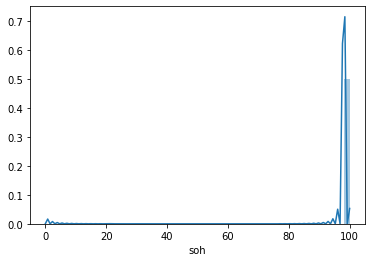

In [0]:
#bat_data['soh'].value_counts()
sns.distplot(bat_data['soh'])

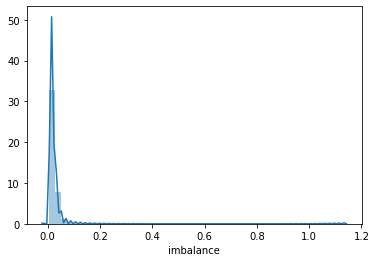

In [0]:
sns.distplot(bat_data['imbalance'])

In [0]:
#regressor = LinearRegression()  
#regressor.fit(X_train, y_train)

In [0]:
#sns.countplot(bat_data['powermode'])

In [0]:
dill.dump_session('dec_tree_complete_data.db')